### Dataset from kaggle: https://www.kaggle.com/datasets/vipulgohel/clustering-pca-assignment

Problem Statement:
    
    After the current funding programs, International Humanitarian NGO has raised around $ 10 million. 
    Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 
    The significant issues that come while making this decision have mostly related to the countries in dire need of Aid. 
    Our job is as Data analyst is to classify the countries using the socio-economic and health factors that determine 
    the overall development of nations. After this analysis, we need to suggest countries that the CEO needs to focus on 
    and give the highest priority.

Loading datasets from local directory and for that let us first get basic packages for it.

In [2]:
import sys
import numpy as np
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(123)

In [3]:
import pandas as pd

Storing the dataset in df variable

In [4]:
df=pd.read_csv("Country-data.csv")

## Descriptive analytics

In [5]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.tail(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


> We come to know that Country is in alphabetic order.<

> And from the website we can comprehend the other columns.<
1) Death of children under five years of age per 1000 live births,
2) Exports of goods and services; Exports of goods and services given as %age of the Total GDP;
3) Imports of goods and services, Given as %age of the Total GDP;
4) Net income per person;
5) The measurement of the annual growth rate of the Total GDP;

In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We have no null values in the dataset

Finding duplicated columns:

In [8]:
dup_sum=df.duplicated().sum()
dup_sum

0

we no duplicated data in the dataset

Information on features 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Describing the dataset

In [10]:
df.describe(include="all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


## Visualizations

importing necessary packages for visualizations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py

Finding the skewness of each numerical column in the dataset

In [12]:
def histskew(col,i):
    plt.subplot(3,3,i)
    plt.title(col)
    sns.distplot(df[col])

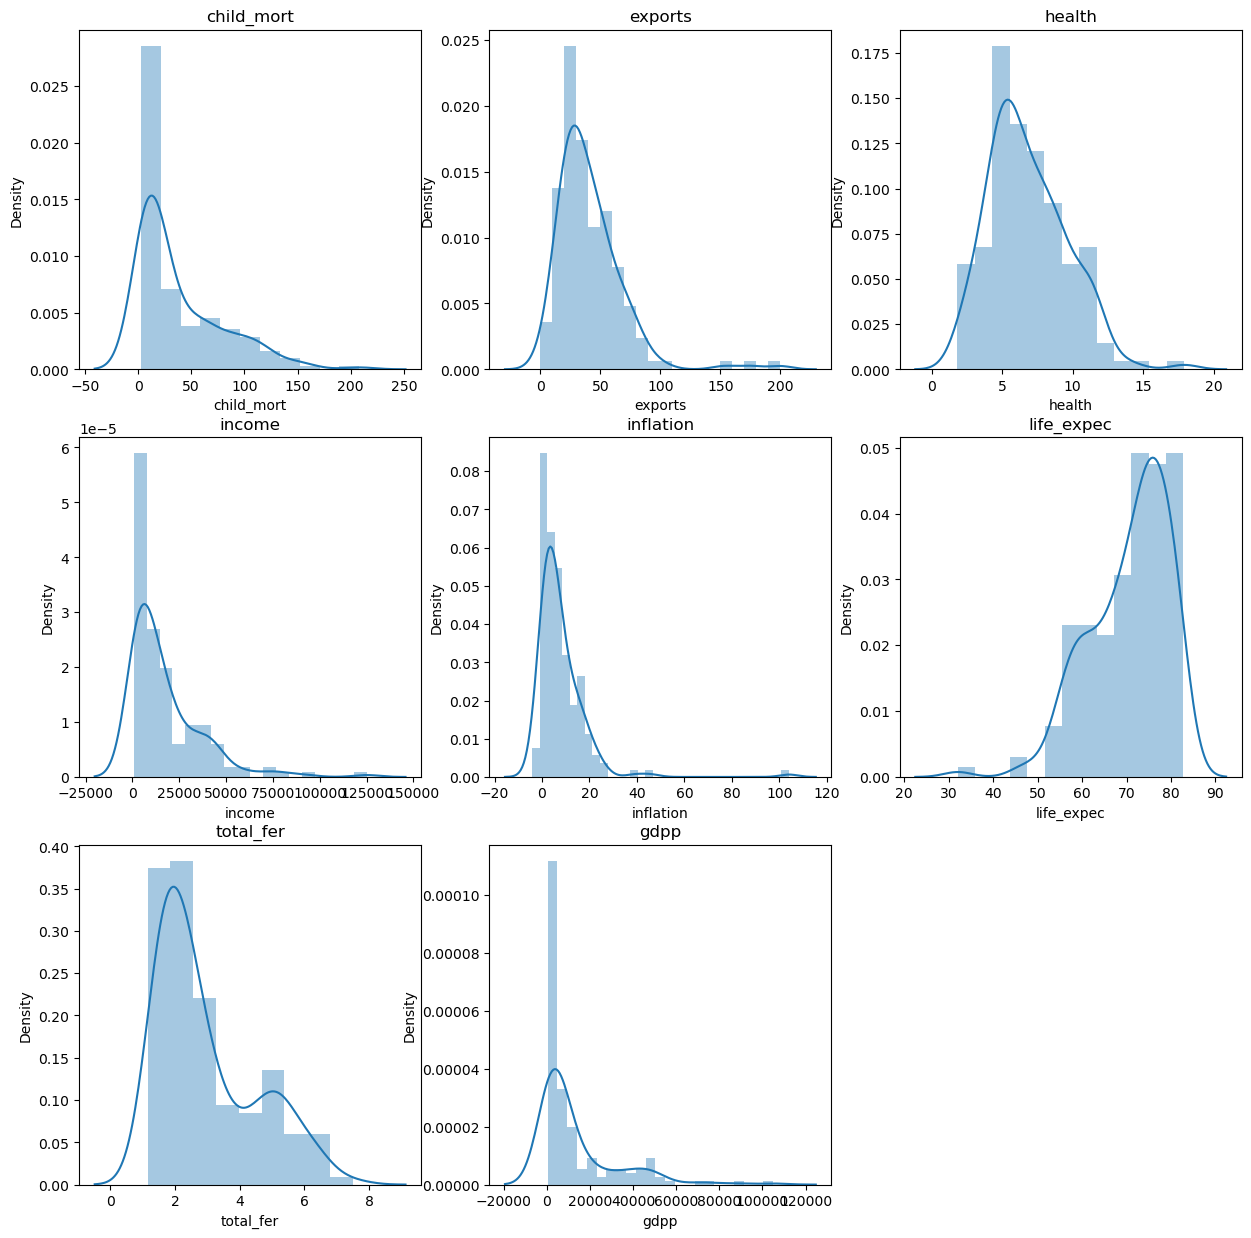

In [13]:
plt.figure(figsize=(15,15))

histskew("child_mort",1)
histskew("exports",2)
histskew("health",3)
histskew("income",4)
histskew("inflation",5)
histskew("life_expec",6)
histskew("total_fer",7)
histskew("gdpp",8)

Lets have  look at how other features influence the countries GDP

In [14]:
def scatter(col,i):
    plt.subplot(3,3,i)
    plt.title(col)
    sns.scatterplot(data=df,x=col,y="gdpp")

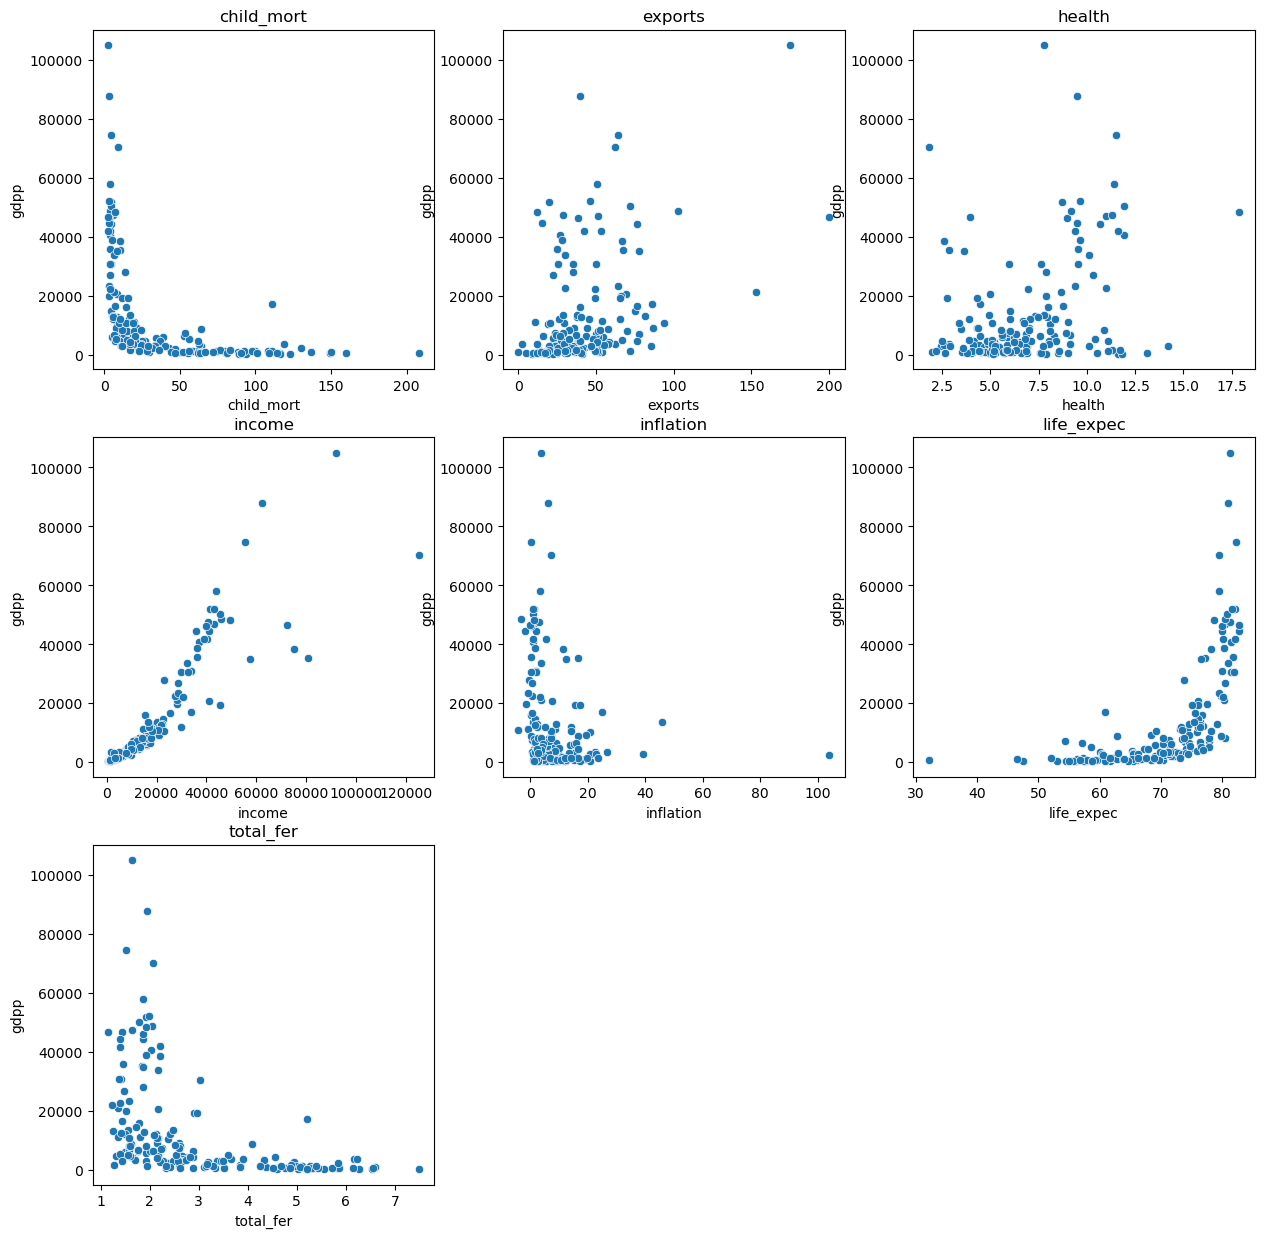

In [15]:
plt.figure(figsize=(15,15))

scatter("child_mort",1)
scatter("exports",2)
scatter("health",3)
scatter("income",4)
scatter("inflation",5)
scatter("life_expec",6)
scatter("total_fer",7)

we can see,
>for child_mort: Lesser the value higher the gdp at few cases.

>for exports: Higher the value higher the gdp.

>for health: Higher the value higher the gdp.

>for income: Positively correlated.

>for inflation: Lesser the value higher the gdp.

>for life_expec: exponential growth.

Looking border view of the dataset

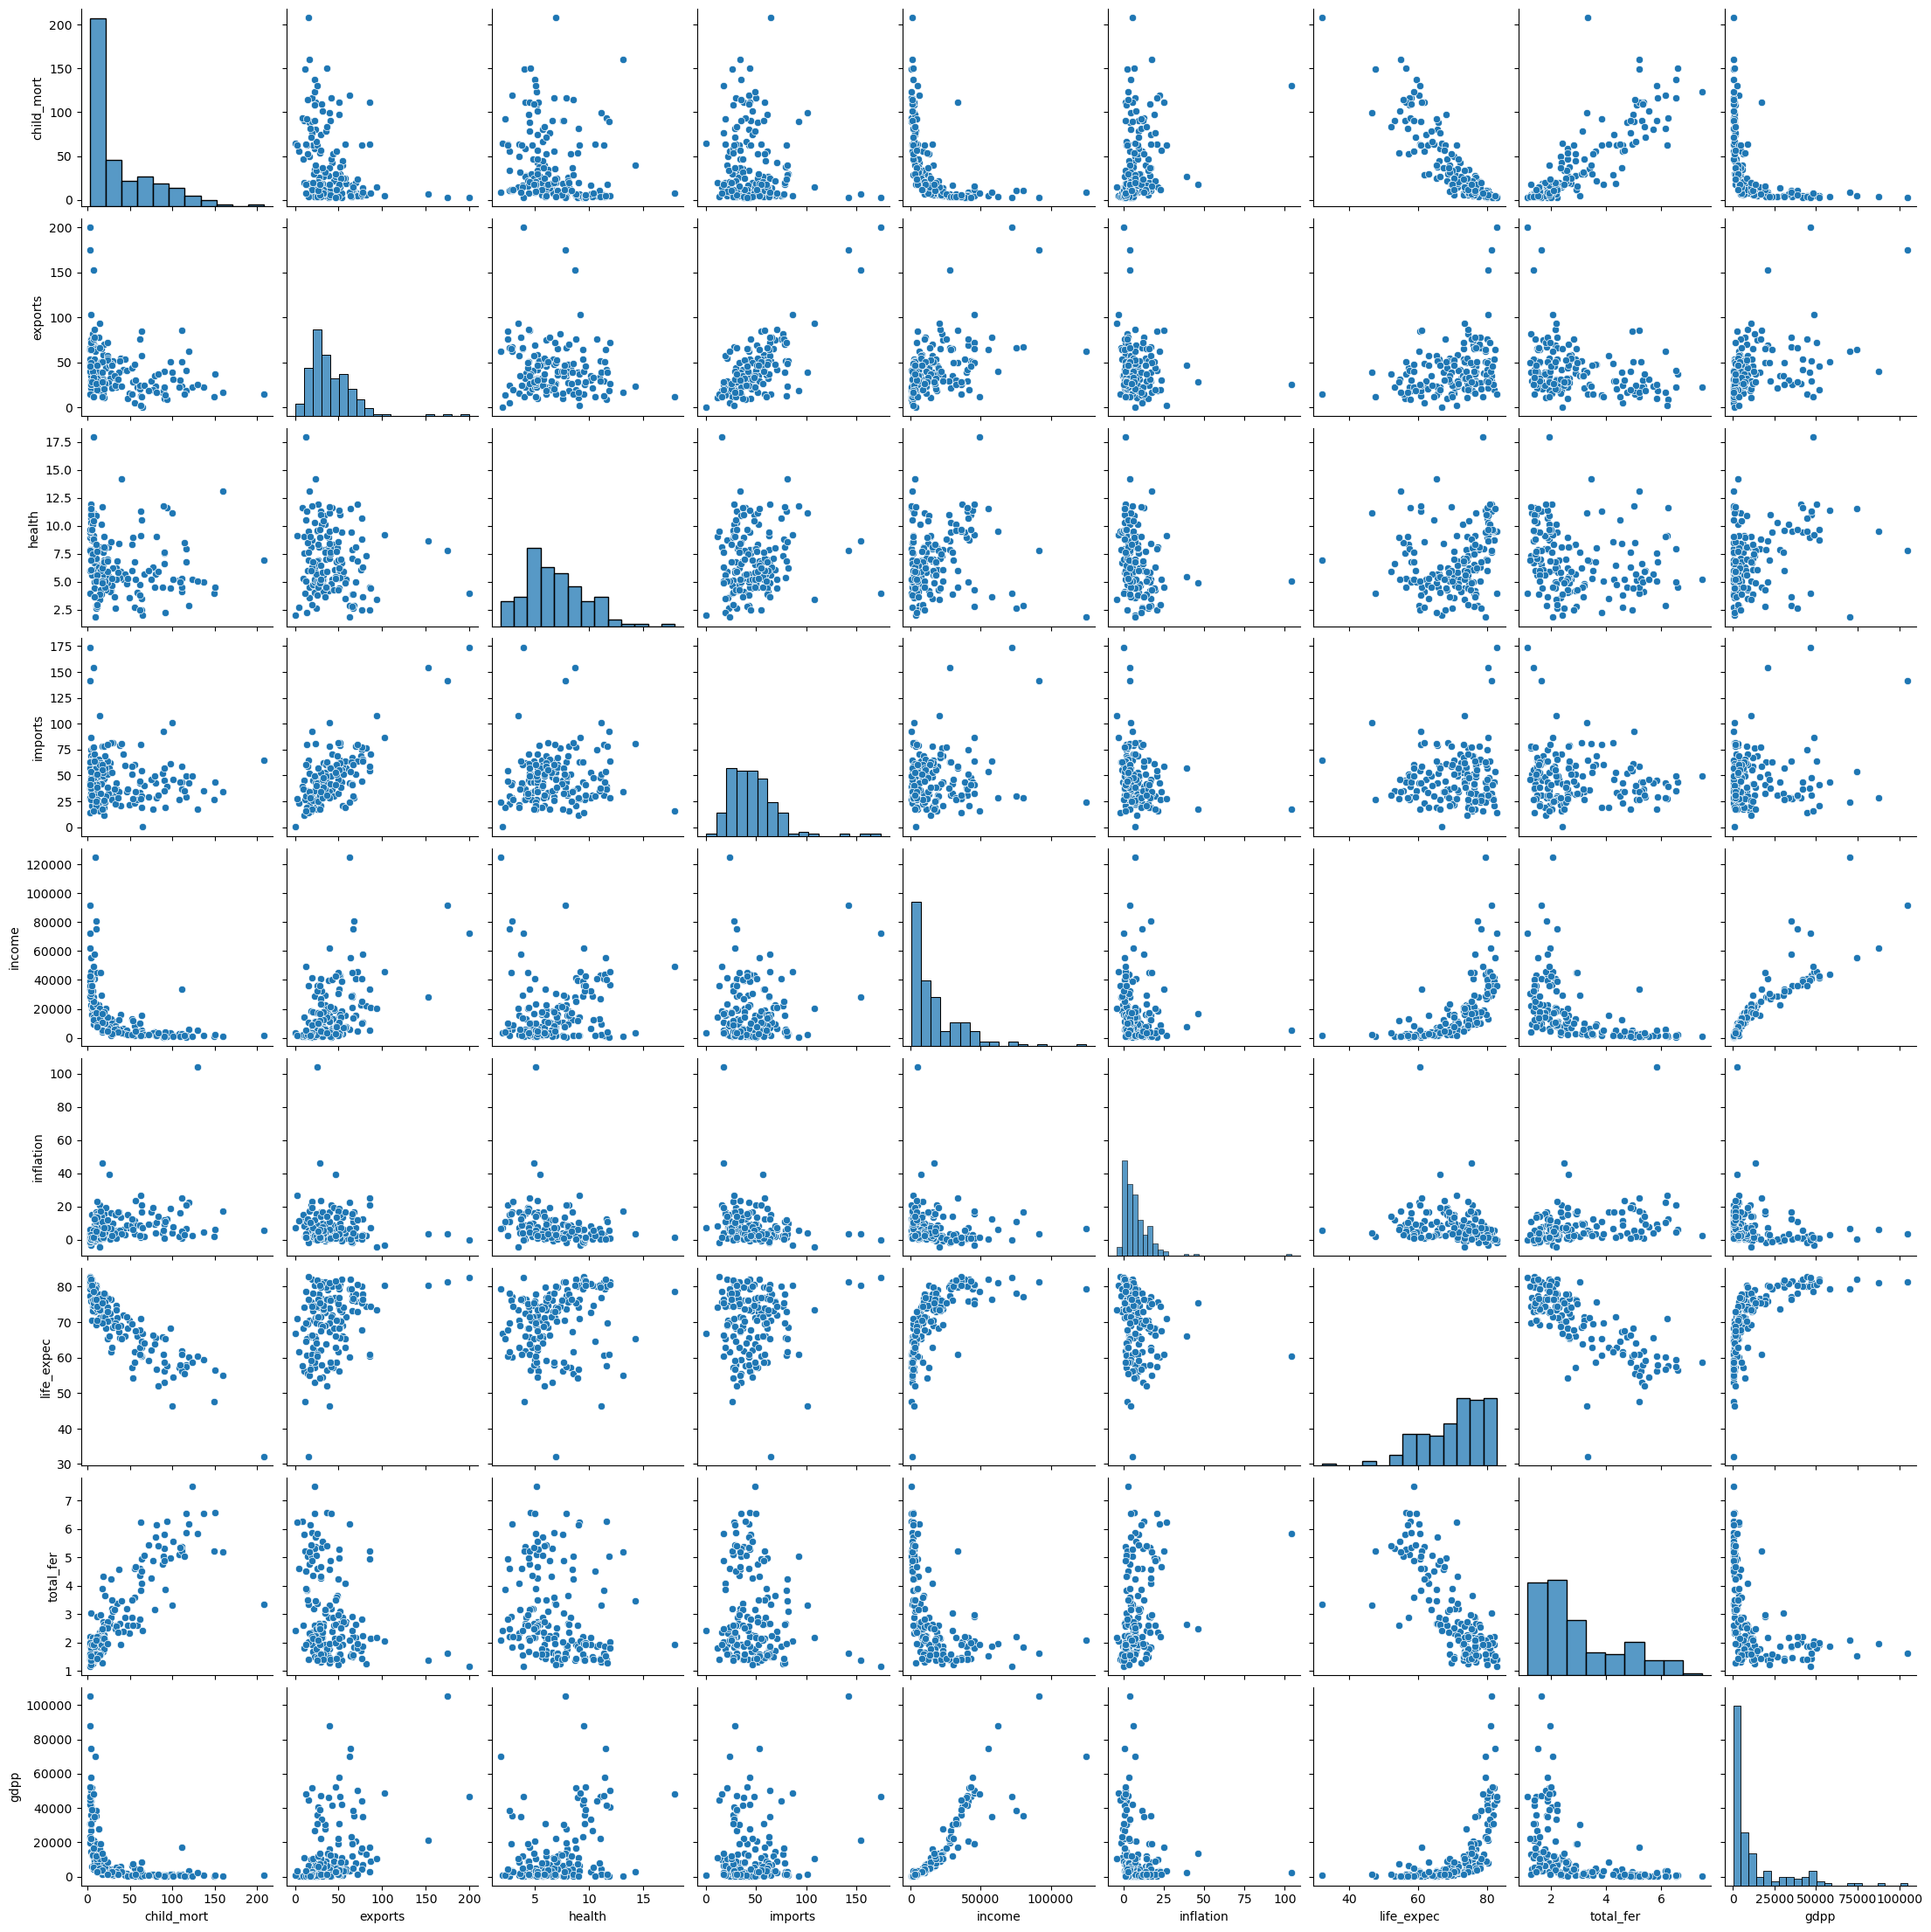

In [16]:
sns.pairplot(df,palette= (["#682F2F","#F3AB60"]))

heatmap analysis on correlation

In [17]:
from matplotlib import colors
cor=df.corr()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Axes: >

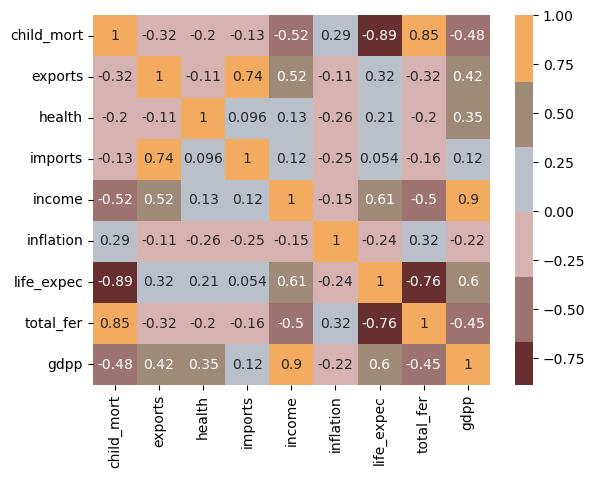

In [18]:
sns.heatmap(cor,annot=True, cmap=cmap, center=0)

## Dimensionality Reduction

importing packages for PCA decomposition

In [19]:
from sklearn.decomposition import PCA

Let me go for 2 column decompisition and 3 column decompisition

2-column decomposition:

In [20]:
X=df.drop("country",axis=1)

In [21]:
decomp=PCA(n_components=2)
pca_array = decomp.fit_transform(X)

In [22]:
dfpca=pd.DataFrame(data=pca_array,columns=["Axis-1","Axis-2"])

Analyzing the dataset from PCA analysis

In [23]:
dfpca.head()

,Axis-1,Axis-2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


In [24]:
dfpca.tail()

,Axis-1,Axis-2
162,-17180.967679,-2487.153835
163,-100.445973,-832.252802
164,-17202.017189,-222.889872
165,-17209.340213,-229.815901
166,-17978.421643,-1163.124631


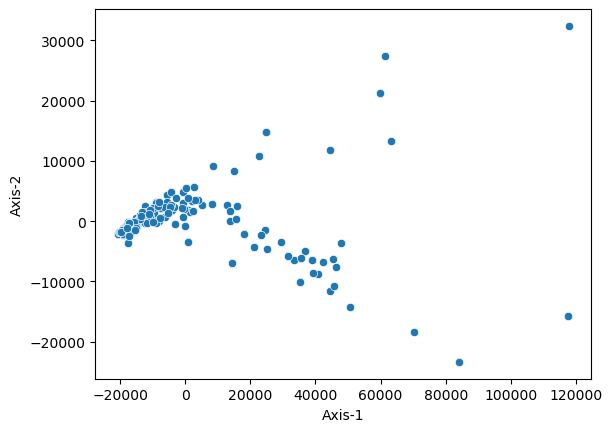

In [25]:
sns.scatterplot(data=dfpca,x="Axis-1",y="Axis-2")
plt.show()

3- columns decompostion:

In [26]:
decomp=PCA(n_components=3)
pca_array = decomp.fit_transform(X)

In [27]:
dfpca_2=pd.DataFrame(data=pca_array,columns=["Axis-1","Axis-2","Axis-3"])

In [28]:
dfpca_2.head()

,Axis-1,Axis-2,Axis-3
0,-19815.128018,-1651.124720,38.424930
1,-11338.938992,1493.469028,-28.182163
2,-8926.352589,3264.684102,-11.916113
3,-14652.465937,-867.795270,59.558400
4,896.142032,1898.478151,-29.133957


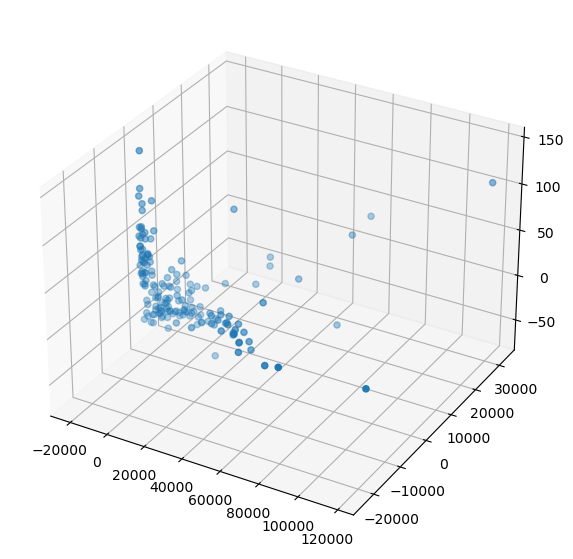

In [29]:
fig=plt.figure(figsize = (7, 7))
plot_axes = fig.add_subplot(111,projection = '3d')
plot_axes.scatter(xs=dfpca_2["Axis-1"],ys=dfpca_2["Axis-2"],zs=dfpca_2["Axis-3"],marker="o")
plt.show()

## implementing DBSCAN algorithm

finding suitable clusters from both decomposition

In [30]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=3)
neigh2=NearestNeighbors(n_neighbors=3)
nb1=neigh.fit(dfpca[["Axis-1","Axis-2"]])
nb2=neigh2.fit(dfpca_2[["Axis-1","Axis-2","Axis-3"]])

DBSCAN requires only two parameters: epsilon and minPoints. 
Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the 
minimum number of data points required inside that circle for that data point to be classified as a Core point.

Finding epsilons

In [31]:
distances_1,indices_1=nb1.kneighbors(dfpca[["Axis-1","Axis-2"]])

In [32]:
distances_2,indices_2=nb2.kneighbors(dfpca_2[["Axis-1","Axis-2","Axis-3"]])

for 2 column decmposition

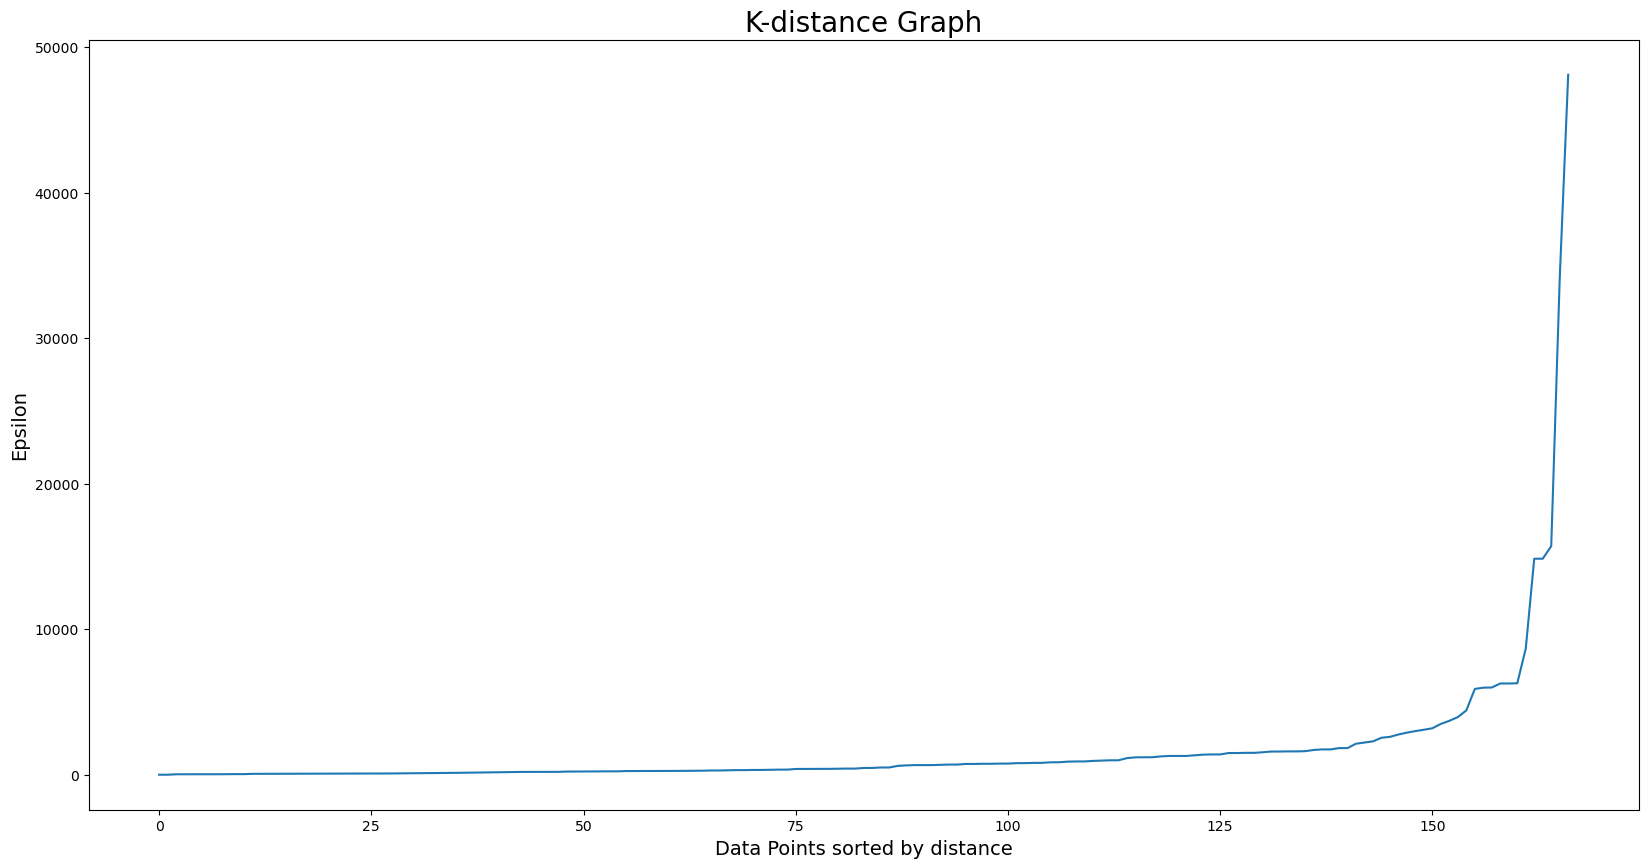

In [33]:
distances = np.sort(distances_1, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

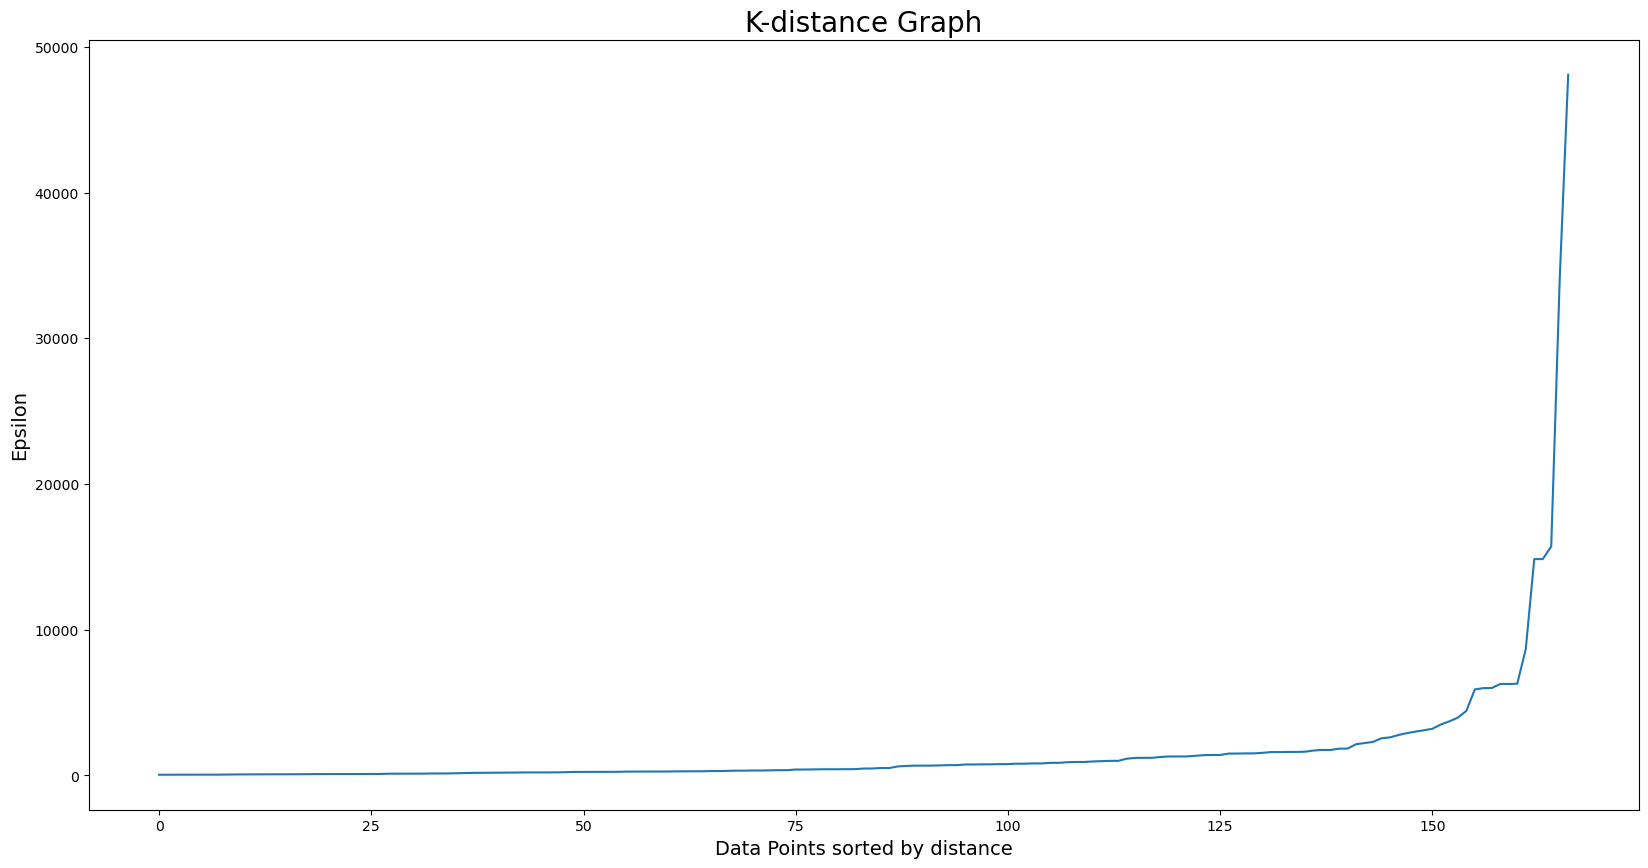

In [34]:
distances = np.sort(distances_2, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

For both analysis we take 2500 as epsilon

And from insights we declare 5 as minpoints

And we use 2 component decomposition here

In [35]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=2500,min_samples=5)
dbscan_opt.fit(dfpca[["Axis-1","Axis-2"]])

DBSCAN(eps=2500)

In [36]:
df['labels']=dbscan_opt.labels_
df['labels'].value_counts()

 0    124
-1     38
 1      5
Name: labels, dtype: int64

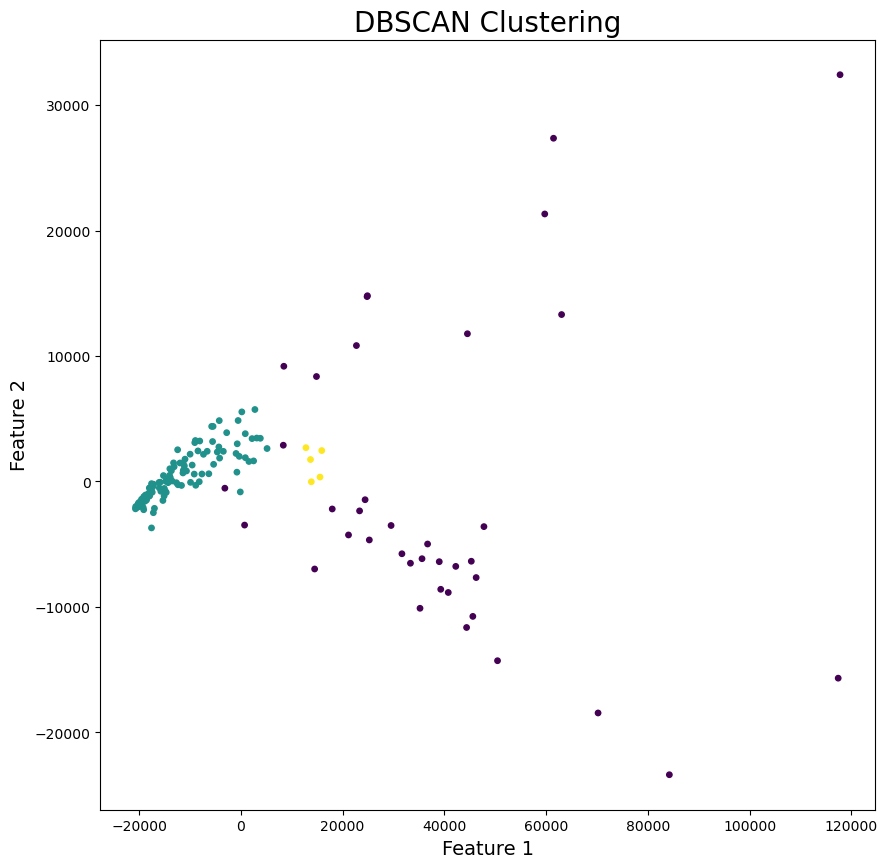

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(dfpca["Axis-1"],dfpca_2["Axis-2"],c=df['labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Evaluation

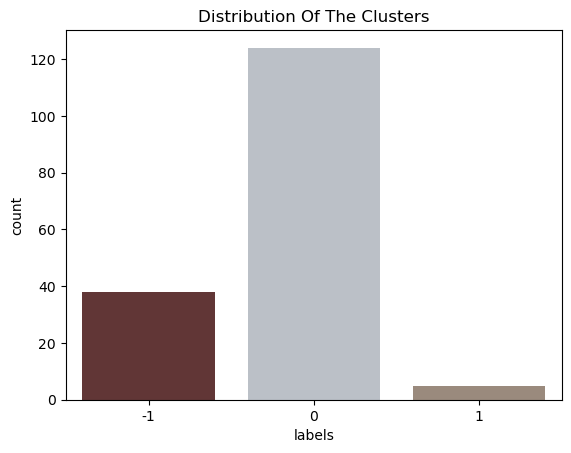

In [38]:
col = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["labels"], palette= col)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [39]:
def scatter(colu,i):
    plt.figure(figsize=(25,15))
    plt.subplot(3,3,i)
    plt.title(colu)
    sns.scatterplot(data=df,x=colu,y="gdpp",hue=df["labels"], palette= col)
    plt.legend()
    plt.show()

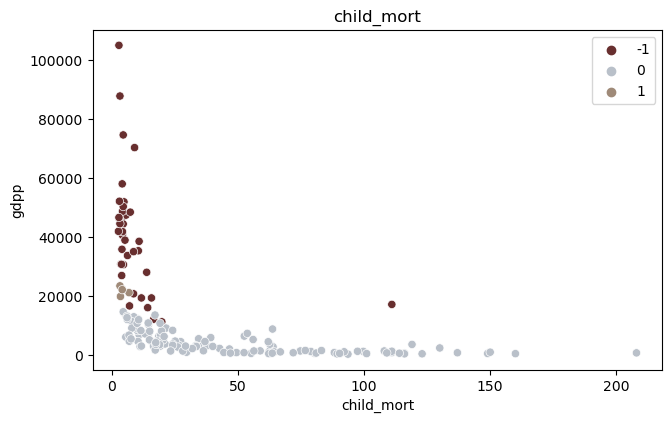

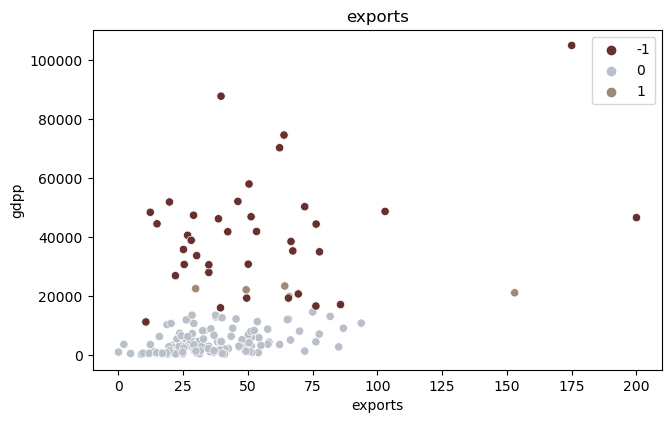

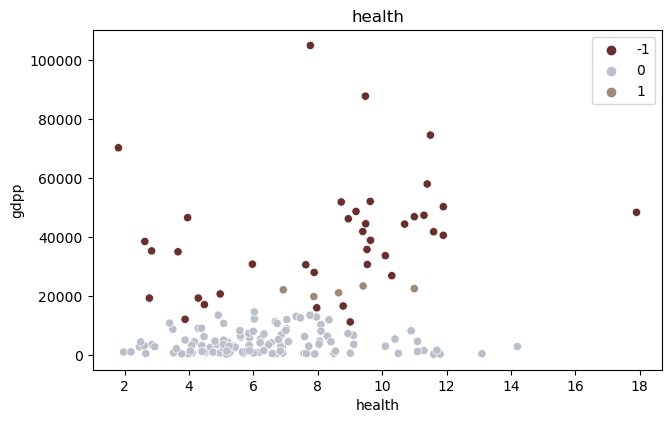

In [40]:
scatter("child_mort",1)
scatter("exports",2)
scatter("health",3)

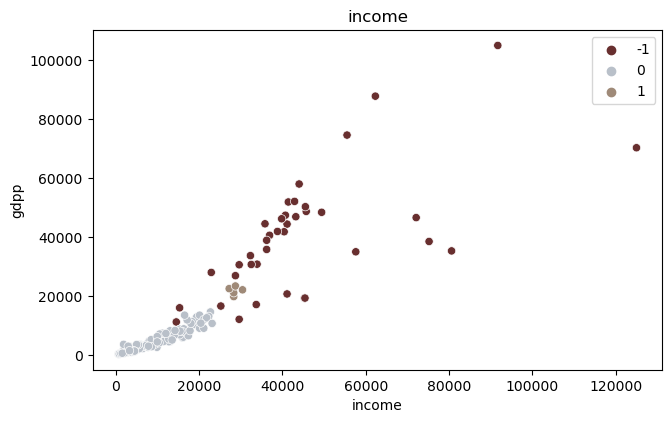

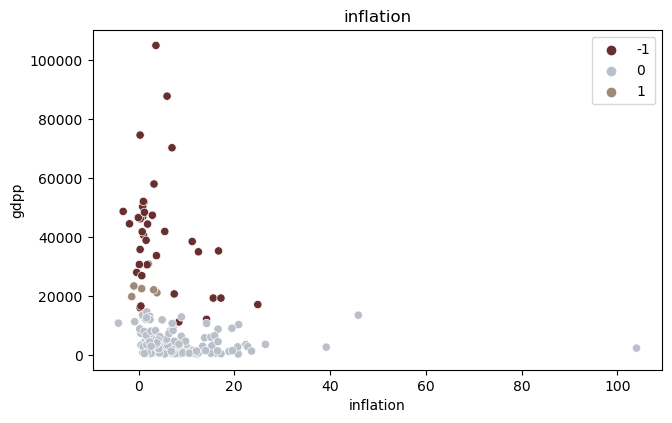

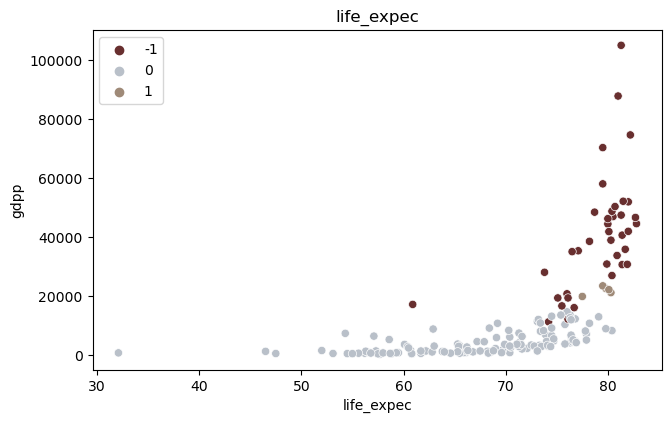

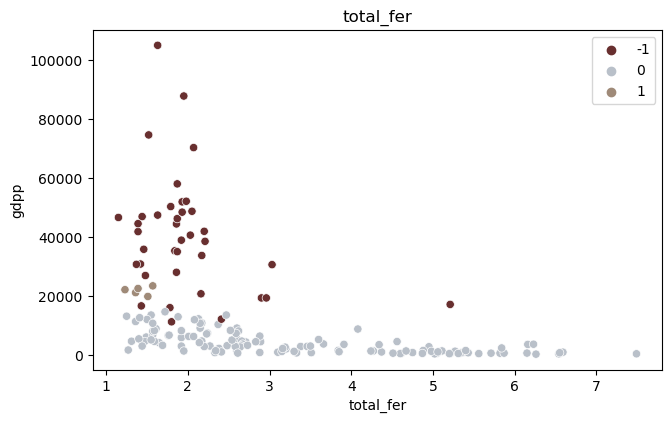

In [41]:
scatter("income",4)
scatter("inflation",5)
scatter("life_expec",6)
scatter("total_fer",7)

In [42]:
df.groupby('labels').describe()

child_mort                                                         \
            count       mean        std  min     25%    50%   75%    max   
labels                                                                     
-1           38.0   9.510526  17.471673  2.6   3.925   4.55   8.9  111.0   
 0          124.0  48.454032  41.183293  4.5  16.975  33.40  72.6  208.0   
 1            5.0   4.280000   1.454991  3.2   3.400   3.90   4.1    6.8   

       exports             ... total_fer         gdpp                \
         count       mean  ...       75%   max  count          mean   
labels                     ...                                        
-1        38.0  55.365789  ...     2.065  5.21   38.0  40628.947368   
 0       124.0  35.473379  ...     4.625  7.49  124.0   4130.758065   
 1         5.0  72.520000  ...     1.510  1.57    5.0  21780.000000   

                                                                    
                 std      min      25%      50%      75%       max  
labels                                                              
-1      20049.855535  11200.0  28650.0  39750.0  48150.0  105000.0  
 0       3758.613054    231.0    997.0   2980.0   6235.0   14600.0  
 1       1380.941708  19800.0  21100.0  22100.0  22500.0   23400.0  

[3 rows x 72 columns]

In [43]:
df.groupby('labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
-1,9.510526,55.365789,8.250000,46.571053,44947.368421,4.504921,78.955263,1.972632,40628.947368
0,48.454032,35.473379,6.297177,45.948112,8163.411290,9.057766,67.623387,3.308790,4130.758065
1,4.280000,72.520000,8.774000,72.680000,28580.000000,1.043200,79.440000,1.412000,21780.000000


## label -1 specifies medium child mortality,medium exports,high income,medium inflation and medium gdp

## label 0 specifies high child mortality,low exports,low income,high inflation and low gdp

## label 1 specifies low child mortality,high exports,medium income,low inflation and medium gdp

# So international Humanitarian NGO should focus on countries with label 0

## Reporting

In [46]:
import sweetviz
feature_config = sweetviz.FeatureConfig(force_cat = ["labels"])

In [47]:
my_report=sweetviz.analyze(df,None,feature_config)
my_report.show_html("NFO_Analysis.html")

                                             |                                             | [  0%]   00:00 ->…

Report NFO_Analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
